#  Installing Libraries

In [35]:
!pip install nltk
!pip install wordcloud
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
# Downloading data for Lemmitization process
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
# installing wordcloud
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\teja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\teja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\teja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\teja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Importing the DataSet

In [14]:
df = pd.read_csv(r"C:\Users\ajay\Downloads\reviews.csv")

df.head(2)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo


# Data Preprocessing

In [16]:
#Converting into lower case
df['content']=df['content'].str.lower()

#Removing links
df['content'] = df['content'].fillna('')

df['content'] = df['content'].apply(lambda x: re.sub(r"http\S+", "", x))

#Remove next lines
df['content'] = df['content'].str.replace('\n',' ')

#Removing words containing numbers
pattern = r'\b\w*\d\w*\b'

def remove_words_containing_numbers(text):
    return re.sub(pattern, '', text)

df['content'] = df['content'].apply(remove_words_containing_numbers)

#Removing extra spaces
df['content'] = df['content'].apply(lambda x: ' '.join(x.split()))

#Removing special characters
df['content'] = df['content'].apply(lambda x: re.sub('[^A-Za-z0-9]+', '', x))

#Removing stop words
stop_words = set(stopwords.words('english'))
# applying the process of removing the stop words using function
def removing_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(text)

df['content'] = df['content'].apply(removing_stopwords)

#Stemming process
stemmer = PorterStemmer()
# applying the process

def stemming_process(word):
    return stemmer.stem(word)

#calling the function
df['content'] = df['content'].apply(lambda x: ' '.join(stemming_process(word) for word in x.split()))

#Lemmatization
lemmatizer = WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

#  Word Cloud Generation

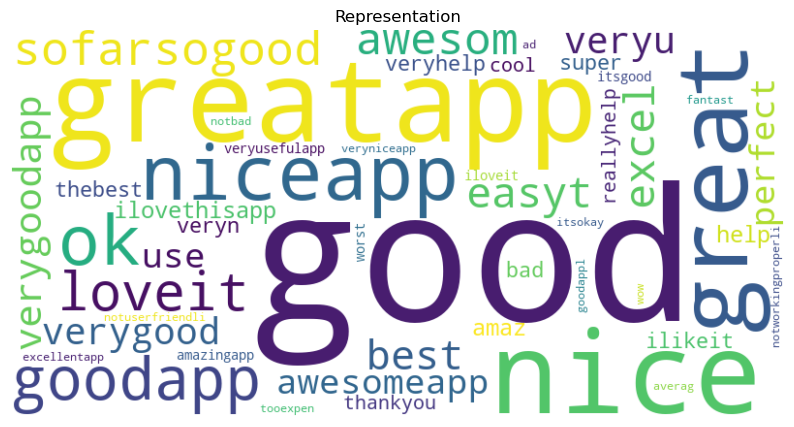

In [46]:
# function for wordcloud
def generate_wordcloud(text):
    wc = WordCloud(width=800, height=400, max_words=50, background_color='white', colormap='viridis').generate(text)
    return wc
# function calling
text = ' '.join(df['content'])
wordcloud = generate_wordcloud(text)
# plot represntation
plt.figure(figsize=(10, 7))
plt.title('Representation')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#  Sentiment Analysis with VADER

In [18]:
#creating a function to perform sentiment analysis using VADER
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment = 'positive' if sentiment_scores['compound'] > 0.05 else 'negative' if sentiment_scores['compound'] < -0.05 else 'neutral'
    return sentiment
#function calling
df['sentiment'] = df['content'].apply(analyze_sentiment_vader)

#  Pictorial representation

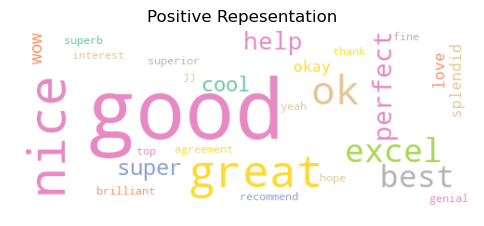

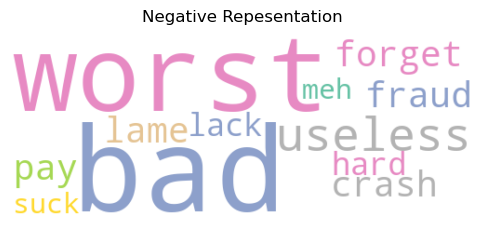

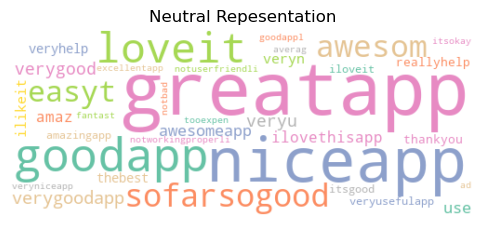

In [39]:
#positive, negative, and neutral categories representation
for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['content'])
    wc = WordCloud(width=500, height=200, max_words=50, background_color='white', colormap='Set2').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(sentiment.capitalize() + ' Repesentation')
    plt.axis('off')
    plt.show()

#  Bar Chart for Sentiment Distribution

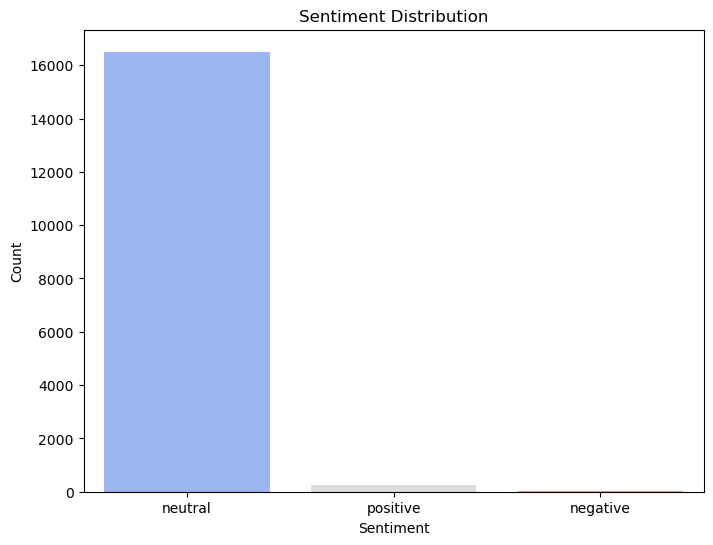

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Top 10 Frequent Words

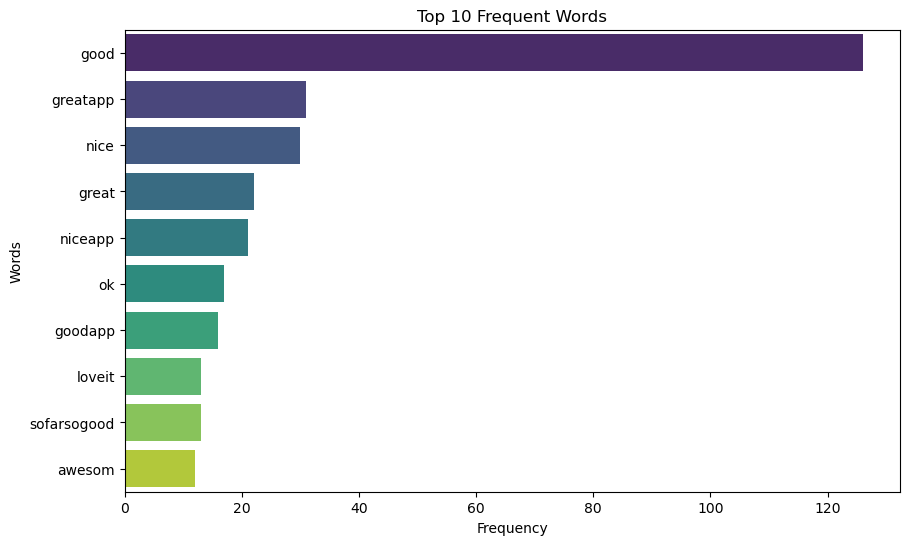

In [24]:
from collections import Counter

# Extracting all words from the 'content' column
all_words = ' '.join(df['content']).split()

# To Get the 10 most common words and their frequencies
common_words = Counter(all_words).most_common(10)

# Convert to a DataFrame for Seaborn
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top 10 Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()
